# Import necessary libraries and load the dataset

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

data = pd.read_csv('Salary_Data.csv')

# Handling missing values by imputing the mean

In [3]:
imputer = SimpleImputer(strategy='mean')
data[['Age', 'Years of Experience', 'Salary']] = imputer.fit_transform(data[['Age', 'Years of Experience', 'Salary']])

# Encoding categorical variables

In [4]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Education Level'] = label_encoder.fit_transform(data['Education Level'])
data['Job Title'] = label_encoder.fit_transform(data['Job Title'])

# Selecting relevant features for clustering

In [5]:
features = data[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']]

# Experimenting with different values of k and displaying the resulting clusters

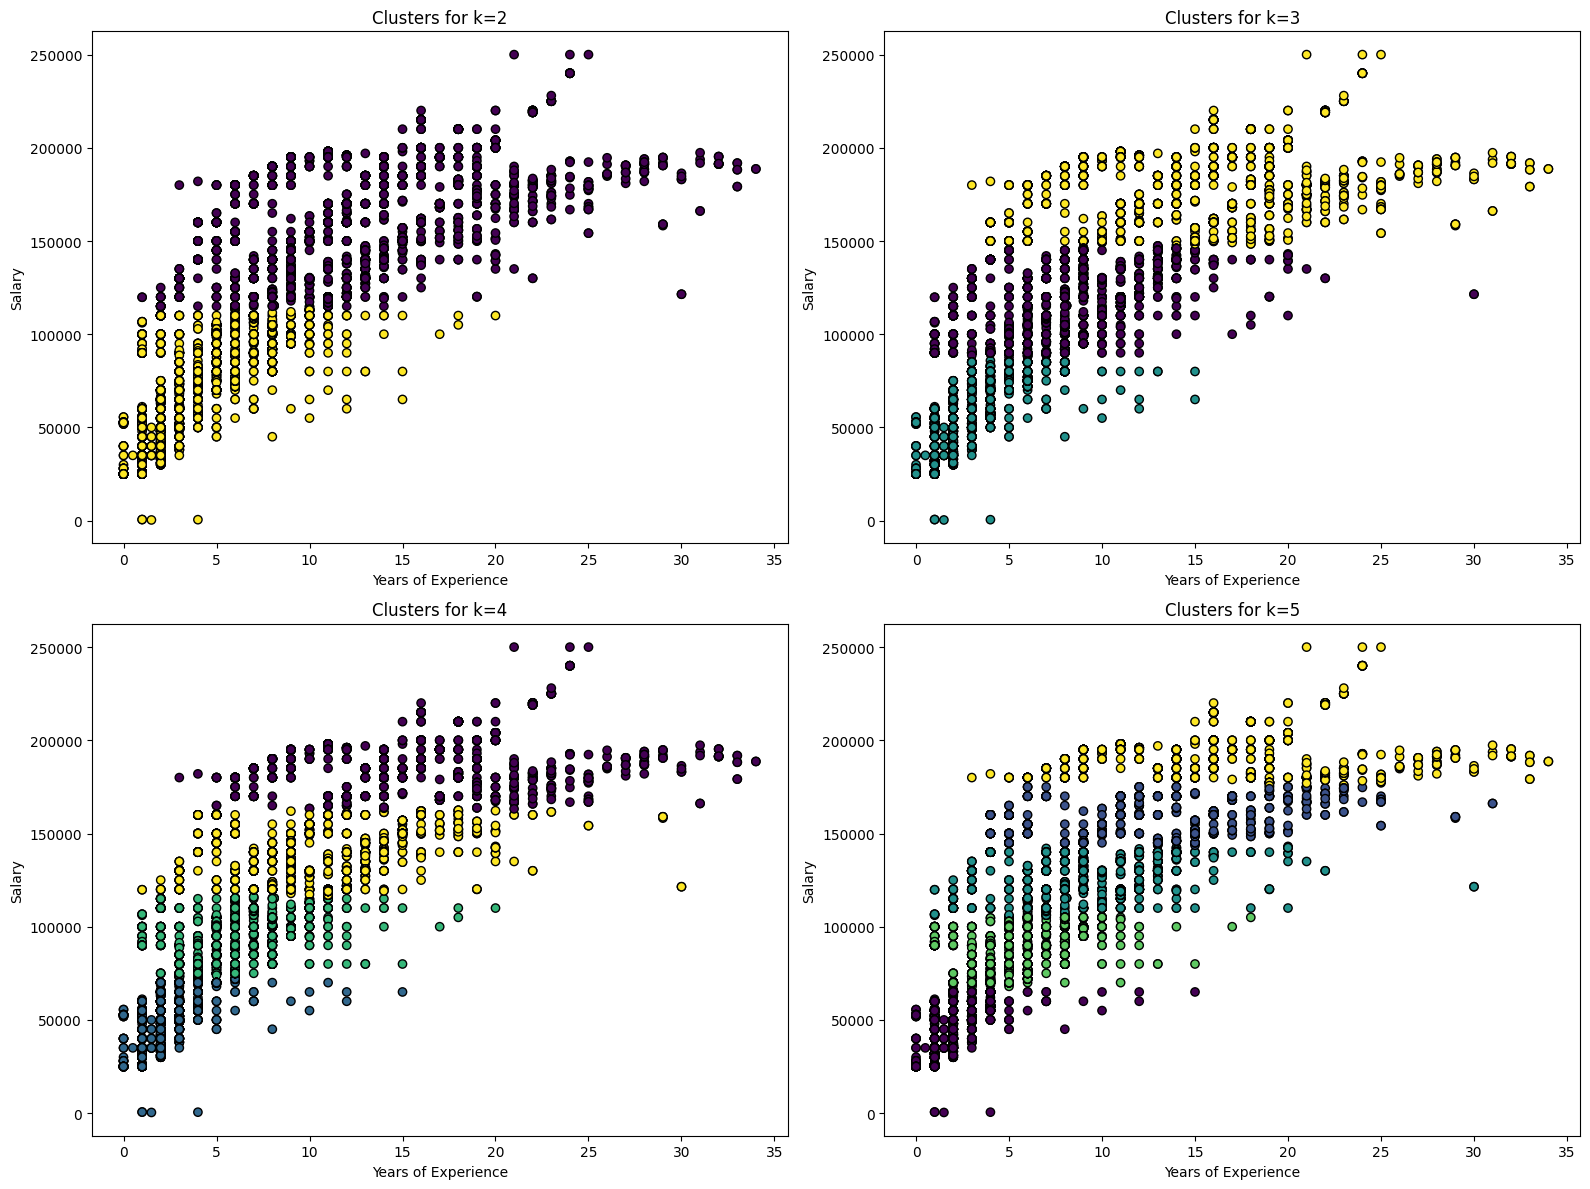

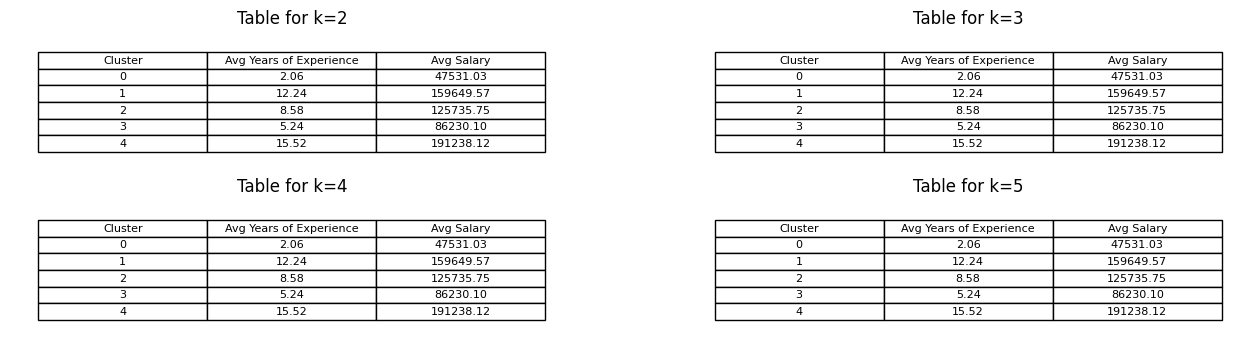

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, k in enumerate(range(2, 6)):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    data['Cluster'] = kmeans.fit_predict(features)
    
    scatter = ax.scatter(data['Years of Experience'], data['Salary'], c=data['Cluster'], cmap='viridis', edgecolor='k')
    
    ax.set_title(f'Clusters for k={k}')
    ax.set_xlabel('Years of Experience')
    ax.set_ylabel('Salary')

plt.tight_layout()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 3.5))

for i, k in enumerate(range(2, 6)):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    cluster_stats = data.groupby('Cluster').agg({'Years of Experience': 'mean', 'Salary': 'mean'}).round(2)
    table_data = [['Cluster', 'Avg Years of Experience', 'Avg Salary']] + [[f'{cluster}', f'{exp:.2f}', f'{salary:.2f}'] for cluster, exp, salary in cluster_stats.itertuples()]

    table = ax.table(cellText=table_data, loc='center', colWidths=[0.3, 0.3, 0.3], cellLoc='center', fontsize=14)
    ax.set_title(f'Table for k={k}')
    ax.axis('off')

plt.show()


# Using the Elbow method to find the optimal k

In [12]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve

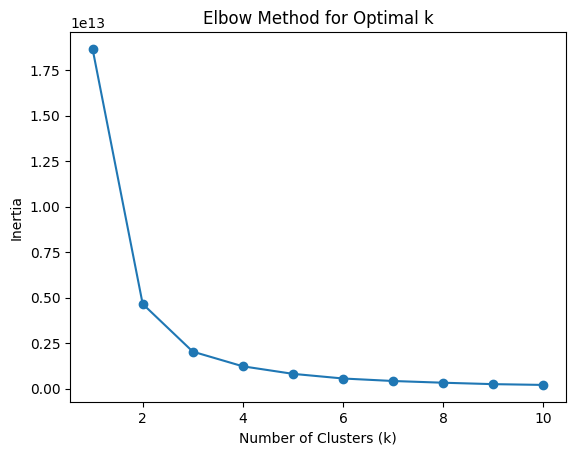

In [8]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Testing Different Options of the k-means Algorithm and displaying the resulting clusters

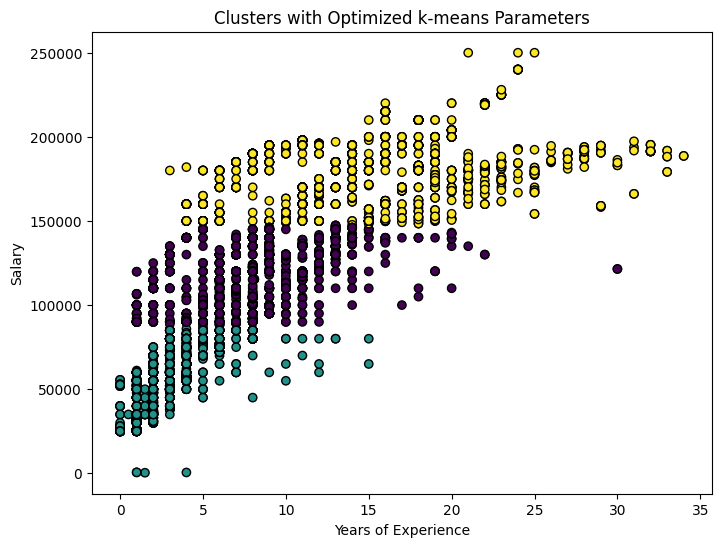

In [15]:
plt.figure(figsize=(8, 6))

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

plt.scatter(data['Years of Experience'], data['Salary'], c=data['Cluster'], cmap='viridis', edgecolor='k')

plt.title('Clusters with Optimized k-means Parameters')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()